<a href="https://colab.research.google.com/github/Isha6789/LGMVIP-Data-Science/blob/main/Task%20-7/TASK_7_Develop_A_Neural_Network_That_Can_Read_Handwriting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"**

**Isha Sharma**

**TASK-7- Develop A Neural Network That Can Read Handwriting :**

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.


Dataset link : https://en.wikipedia.org/wiki/MNIST_database

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


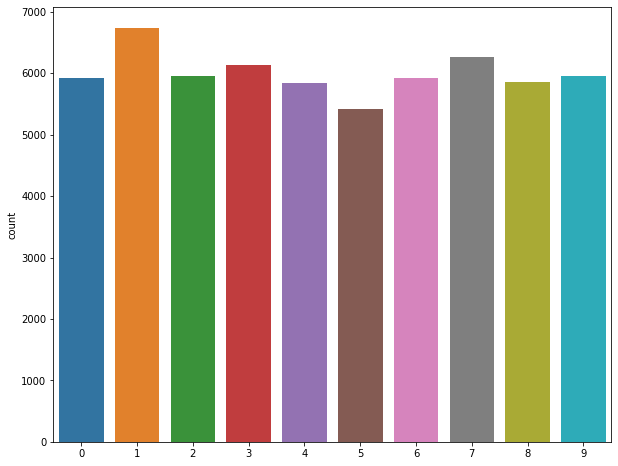

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

Displaying some images


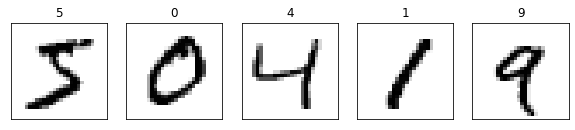

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Pre-processing the data


In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

Creating the model
Model Architecture
We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers

2. Dropout - to prevent overfitting

3. Dense - a fully connected layer

4. Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

```
```



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

Training the model


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 576s 341ms/step - loss: 0.1668 - accuracy: 0.9525 - val_loss: 0.0989 - val_accuracy: 0.9822
Epoch 2/10
1688/1688 [==============================] - 571s 338ms/step - loss: 0.1023 - accuracy: 0.9704 - val_loss: 0.1304 - val_accuracy: 0.9795
Epoch 3/10
1688/1688 [==============================] - 573s 340ms/step - loss: 0.0809 - accuracy: 0.9766 - val_loss: 0.1294 - val_accuracy: 0.9827
Epoch 4/10
1688/1688 [==============================] - 572s 339ms/step - loss: 0.0722 - accuracy: 0.9791 - val_loss: 0.1292 - val_accuracy: 0.9823
Epoch 5/10
1688/1688 [==============================] - 571s 338ms/step - loss: 0.0599 - accuracy: 0.9828 - val_loss: 0.1314 - val_accuracy: 0.9838
Epoch 6/10
1688/1688 [==============================] - 570s 338ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.1019 - val_accuracy: 0.9857
Epoch 7/10
1688/1688 [==============================] - 563s 333ms/step - loss: 0.0500 - accuracy: 0.9853 - val_

In [10]:

model.save('MNproject.h5')


In [11]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

Evaluating the model


In [12]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 22s 70ms/step - loss: 3.3890 - accuracy: 0.9873
Test Loss 3.38903546333313
Test Accuracy 0.9872999787330627


Plotting Training & Validation plots


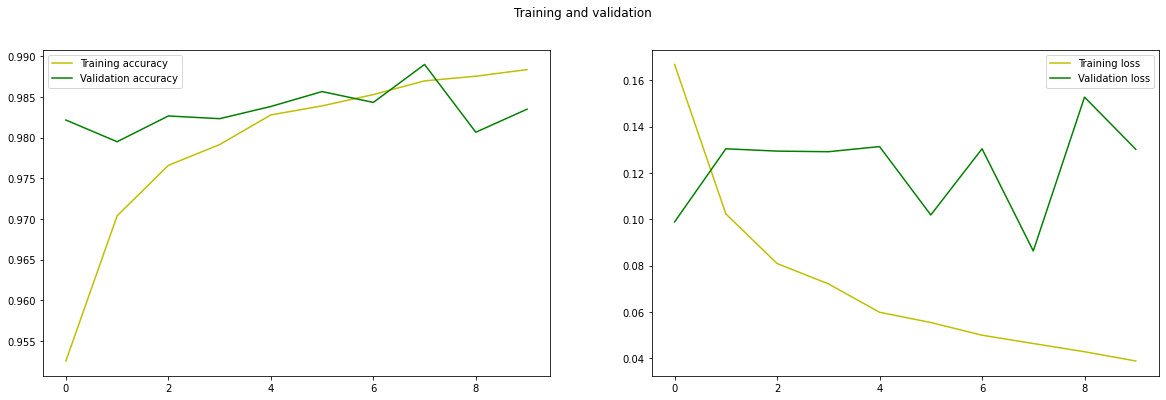

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()



In [14]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    3,    0,    4,    1,    0,    1],
       [   0, 1117,    5,    0,    8,    0,    2,    3,    0,    0],
       [   1,    0, 1022,    0,    6,    0,    0,    2,    1,    0],
       [   0,    0,    3, 1001,    0,    1,    0,    2,    2,    1],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   1,    0,    0,    4,    0,  881,    4,    0,    0,    2],
       [   0,    1,    0,    0,   12,    1,  944,    0,    0,    0],
       [   0,    2,   14,    2,    2,    1,    0, 1004,    1,    2],
       [   1,    0,    2,    1,    1,    0,    1,    0,  965,    3],
       [   2,    0,    1,    0,    8,    3,    0,    1,    3,  991]],
      dtype=int32)>

Plotting heat map


Text(69.0, 0.5, 'Truth')

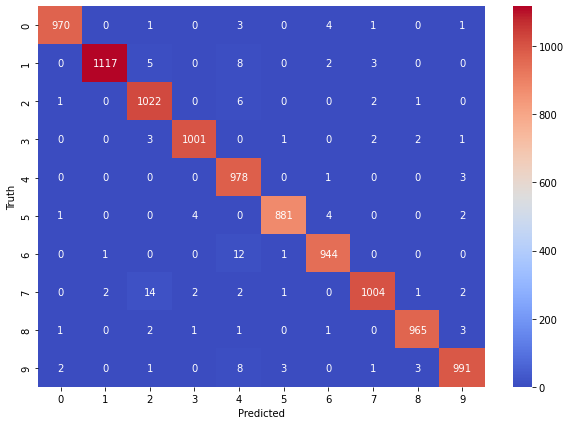

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')